### Importing Data using the follwoing link:
https://blog.quantinsti.com/gold-price-prediction-using-machine-learning-python/

In [259]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd
import numpy as np
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


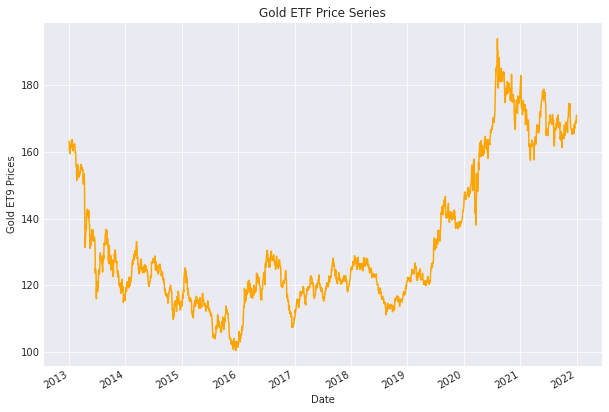

In [260]:
# Read data
Df_g = yf.download('GLD', '2013-1-01', '2022-1-01', auto_adjust=True)

# Only keep close columns
Df_g = Df_g[['Close']]

# Drop rows with missing values
Df_g = Df_g.dropna()


# Plot the closing price of GLD
Df_g.Close.plot(figsize=(10, 7),color='orange')
plt.ylabel("Gold ET9 Prices")
plt.title("Gold ETF Price Series")
plt.show()

#Df_g = np.array(Df_g.Close)

[*********************100%***********************]  1 of 1 completed


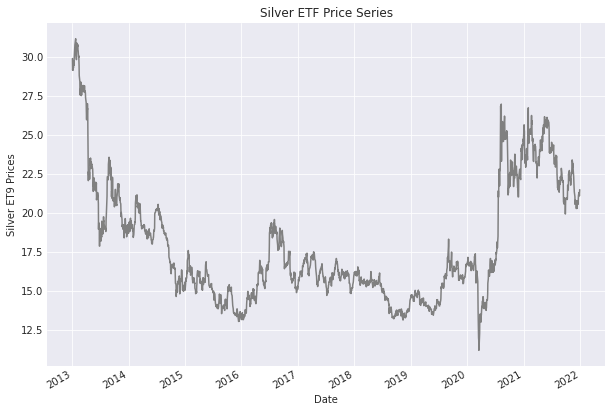

In [261]:
# Read data
Df_s = yf.download('SLV', '2013-1-01', '2022-1-01', auto_adjust=True)

# Only keep close columns
Df_s = Df_s[['Close']]

# Drop rows with missing values
Df_s = Df_s.dropna()

# Plot the closing price of GLD
Df_s.Close.plot(figsize=(10, 7),color='gray')
plt.ylabel("Silver ET9 Prices")
plt.title("Silver ETF Price Series")
plt.show()



#Df_s = np.array(Df_s.Close)

[*********************100%***********************]  1 of 1 completed


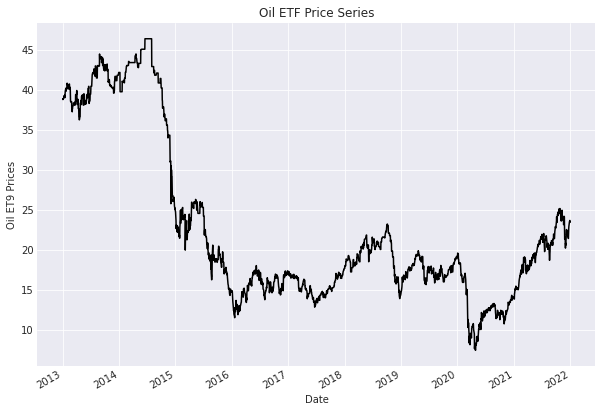

In [262]:
# Read data
Df_o = yf.download('OIL', '2013-1-01', '2022-1-01', auto_adjust=True)

# Only keep close columns
Df_o = Df_o[['Close']]

# Drop rows with missing values
Df_o = Df_o.dropna()

# Plot the closing price of GLD
Df_o.Close.plot(figsize=(10, 7),color='black')
plt.ylabel("Oil ET9 Prices")
plt.title("Oil ETF Price Series")
plt.show()



#Df_o = np.array(Df_o.Close)

[*********************100%***********************]  1 of 1 completed


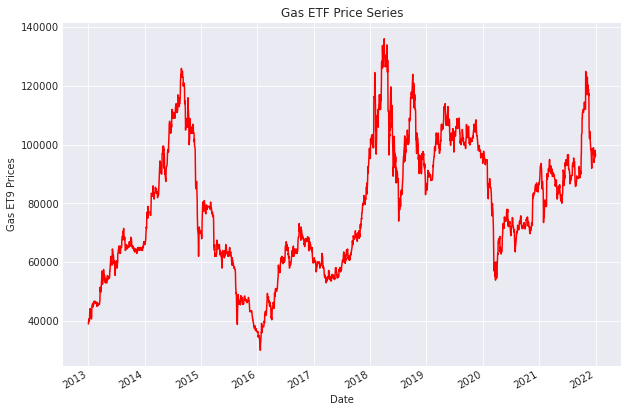

In [263]:
# Read data
Df_c = yf.download('GAS', '2013-1-01', '2022-1-01', auto_adjust=True)

# Only keep close columns
Df_c = Df_c[['Close']]

# Drop rows with missing values
Df_c = Df_c.dropna()

# Plot the closing price of GLD
Df_c.Close.plot(figsize=(10, 7),color='red')
plt.ylabel("Gas ET9 Prices")
plt.title("Gas ETF Price Series")
plt.show()



#Df_c = np.array(Df_c.Close)

[*********************100%***********************]  1 of 1 completed


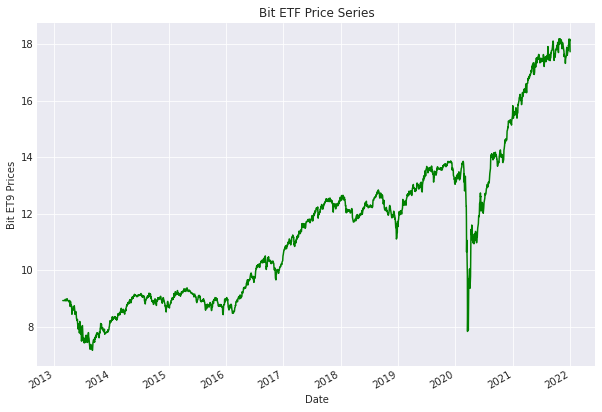

In [264]:
# Read data
Df_b = yf.download('BIT', '2013-1-01', '2022-1-01', auto_adjust=True)

# Only keep close columns
Df_b = Df_b[['Close']]

# Drop rows with missing values
Df_b = Df_b.dropna()

# Plot the closing price of GLD
Df_b.Close.plot(figsize=(10, 7),color='green')
plt.ylabel("Bit ET9 Prices")
plt.title("Bit ETF Price Series")
plt.show()



#Df_b = np.array(Df_b.Close)

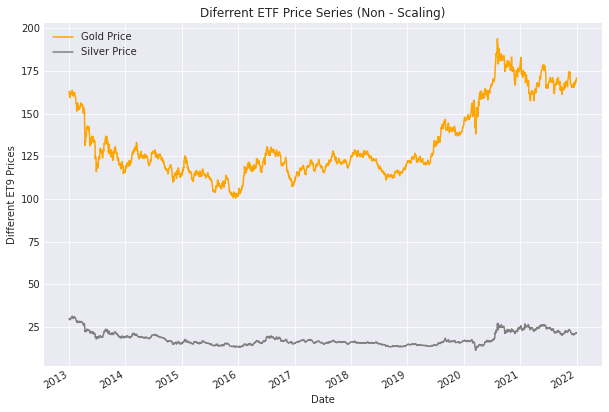

In [265]:
#Df_c=Df_c / 1000

Df_g.Close.plot(figsize=(10, 7),color='orange', label= "Gold Price")
Df_s.Close.plot(figsize=(10, 7),color='gray', label= "Silver Price")
#Df_o.Close.plot(figsize=(10, 7),color='black', label= "Oil Price")
#Df_c.Close.plot(figsize=(10, 7),color='red', label= "Gass Price")
#Df_b.Close.plot(figsize=(10, 7),color='green', label= "Bit Price")
plt.ylabel("Different ET9 Prices")
plt.title("Diferrent ETF Price Series (Non - Scaling)")
plt.legend()

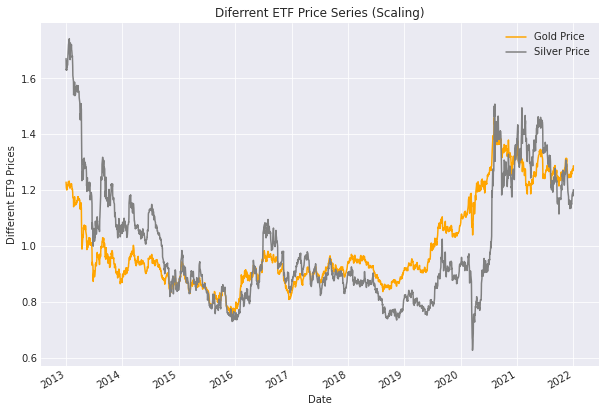

In [266]:
Df_c_scale = Df_c / np.mean(Df_c)
Df_g_scale = Df_g / np.mean(Df_g)
Df_o_scale = Df_o / np.mean(Df_o)
Df_s_scale = Df_s / np.mean(Df_s)


Df_g_scale.Close.plot(figsize=(10, 7),color='orange', label= "Gold Price")
Df_s_scale.Close.plot(figsize=(10, 7),color='gray', label= "Silver Price")
#Df_o_scale.Close.plot(figsize=(10, 7),color='black', label= "Oil Price")
#Df_c_scale.Close.plot(figsize=(10, 7),color='red', label= "Gass Price")
#Df_b.Close.plot(figsize=(10, 7),color='green', label= "Bit Price")
plt.ylabel("Different ET9 Prices")
plt.title("Diferrent ETF Price Series (Scaling)")
plt.legend()

In [268]:
Df_g = (Df_g_scale.Close)
Df_s = (Df_s_scale.Close)
#df = np.array(Df.Close)
corr= np.correlate( Df_g , Df_s,  mode='same')

Text(0.5, 1.0, 'Coss-Correlation for Gold and Silver ')

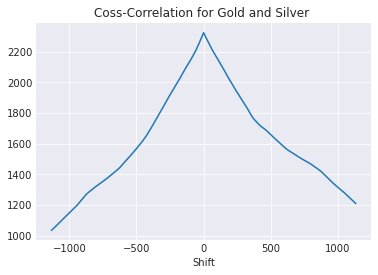

In [270]:
x_a= np.linspace(0,len(Df_g),len(Df_g))
x_array= x_a -np.mean(x_a)
plt.plot(x_array, corr)
plt.xlabel("Shift")
plt.title("Coss-Correlation for Gold and Silver ")


In [351]:
dt = 1 # the int is one work day not calender day 
# 253 work days
# 0.008
#df = np.array(Df.Close)
time = np.linspace(0,len(Df_g), len(Df_g))

a_g , b_g, c_g = np.polyfit(time,Df_g, 2) #fit to linear function #input time #output co2 data
detrended_g = ((time**2) *(a_g)) + (time * b_g) + c_g   
#fitPolynomial = np.polyval(polyConstants, time) #This is the trend to remove.
#g_detrended = Df_g - fitPolynomial
detrended_g = Df_g - detrended_g 

a_s , b_s ,c_s  =np.polyfit(time,Df_s, 2) #fit to linear function #input time #output co2 data
detrended_s = ((time**2)*(a_s)) + (time * b_s) + c_s   
detrended_s =  Df_s - detrended_s

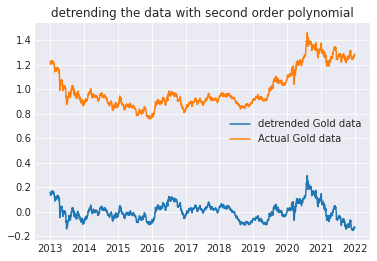

In [352]:
plt.plot(detrended_g, label = "detrended Gold data")
plt.plot(Df_g, label = "Actual Gold data")
plt.title("detrending the data with second order polynomial")
plt.legend()
plt.show()

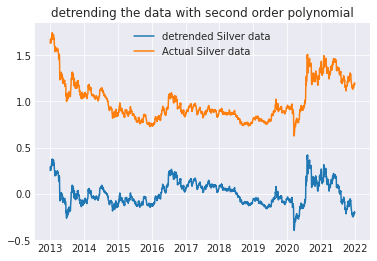

In [353]:
plt.plot(detrended_s, label = "detrended Silver data")
plt.plot(Df_s, label = "Actual Silver data")
plt.title("detrending the data with second order polynomial")
plt.legend()

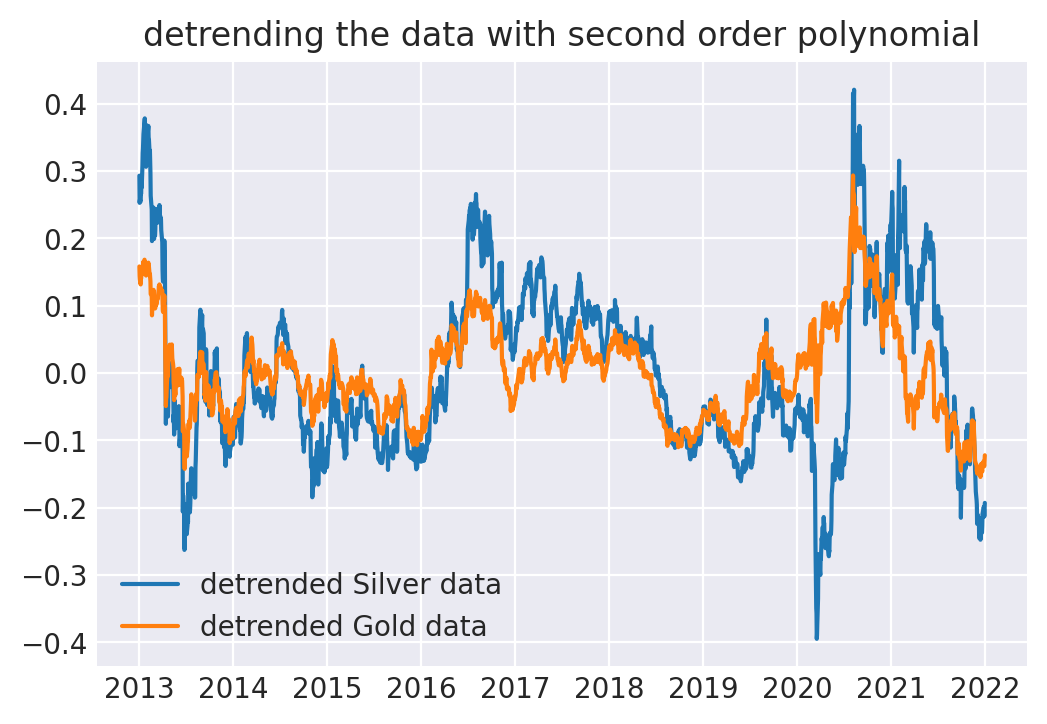

In [354]:
plt.figure(dpi= 200)
plt.plot(detrended_s, label = "detrended Silver data")
plt.plot(detrended_g , label = "detrended Gold data")
plt.title("detrending the data with second order polynomial")
plt.legend()

Text(0.5, 1.0, 'Coss-Correlation for Gold and Silver (detrended data) ')

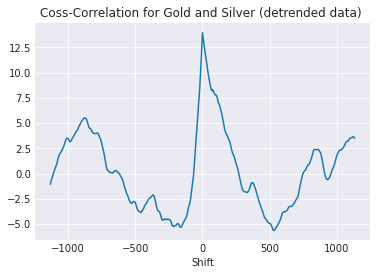

In [355]:
corr= np.correlate(detrended_s ,detrended_g,  mode='same')
x_a= np.linspace(0,len(detrended_s),len(detrended_s))
x_array= x_a -np.mean(x_a)
plt.plot(x_array, corr)
plt.xlabel("Shift")
plt.title("Coss-Correlation for Gold and Silver (detrended data) ")

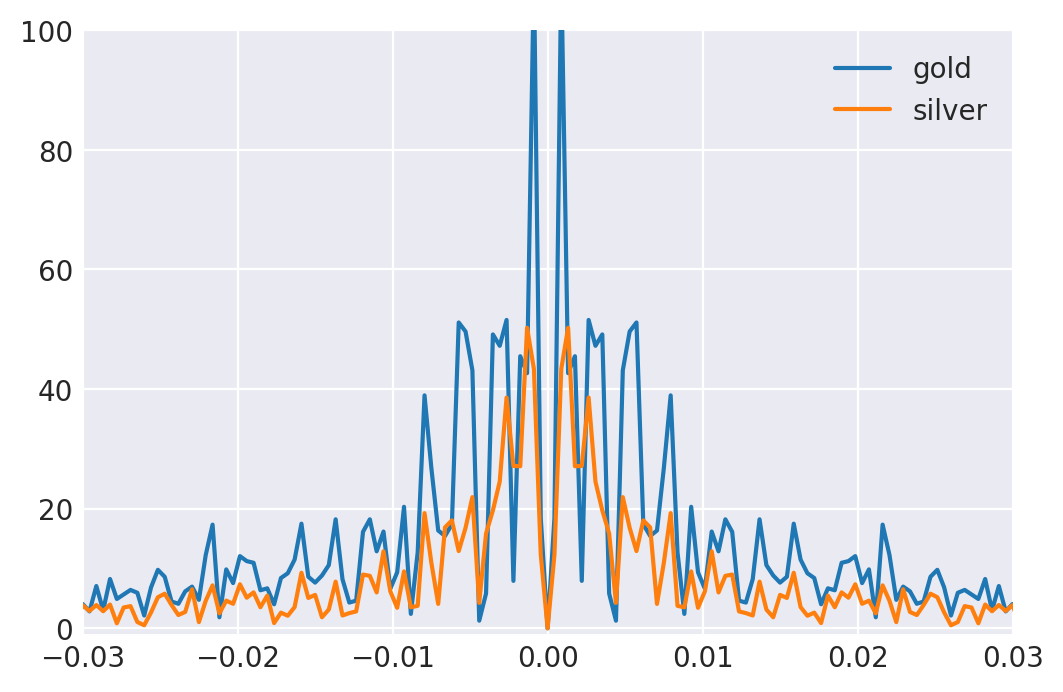

In [356]:
dt = 1 # day 

#already scaled
fft_df_g = np.fft.fftshift(np.fft.fft(detrended_s))
fft_df_s = np.fft.fftshift(np.fft.fft(detrended_g))

f_axis = np.fft.fftshift( np.fft.fftfreq(len(x_a), dt) )

plt.figure(dpi= 200)
plt.plot(f_axis, np.abs(fft_df_g), label="gold")
plt.plot(f_axis, np.abs(fft_df_s), label="silver")

plt.xlim(-0.03,0.03)
plt.ylim(-1, 100)
plt.legend()
#plt.xticks([1/253, 2/(253),4/(253)], ["year", "Half", "Q"])


# we are looking for n intrestng bump in the frequency data. 
# for a cycle in period of one year 1/253 = 0.004

In [ ]:
### frequency components do line up some where n the range of 0.2 and 0.3 which indicates that they have  similar frequency component. 

### compare other data set 

### low pass ang high pass  (just for fun )


In [417]:

def quackFilter(values, passFrequency, dt, mode="high"):
    numpy=np
    answerFT = numpy.fft.fft(values)
    answerFrequencies = numpy.fft.fftfreq(len(answerFT), dt)
    
    differenceFromPassFrequency = numpy.abs(answerFrequencies) - passFrequency
    if(mode == "low"): # If low pass, flip the difference direction.
        differenceFromPassFrequency *= -1
    
    frequencyIsAboveThreshold = numpy.sign(numpy.maximum(0, differenceFromPassFrequency)) # 1 at frequencies to keep, 0 otherwise
    print("mode", mode, "keeping", numpy.count_nonzero(frequencyIsAboveThreshold))
    
    #plt.plot(answerFrequencies, differenceFromPassFrequency)
    #plt.plot(answerFrequencies, frequencyIsAboveThreshold)
    #plt.title(mode)
    #plt.show()
    
    answerFT = answerFT * frequencyIsAboveThreshold #unchanged
    answer = numpy.fft.ifft(answerFT)
    return answer



mode high keeping 2248
mode low keeping 19


/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


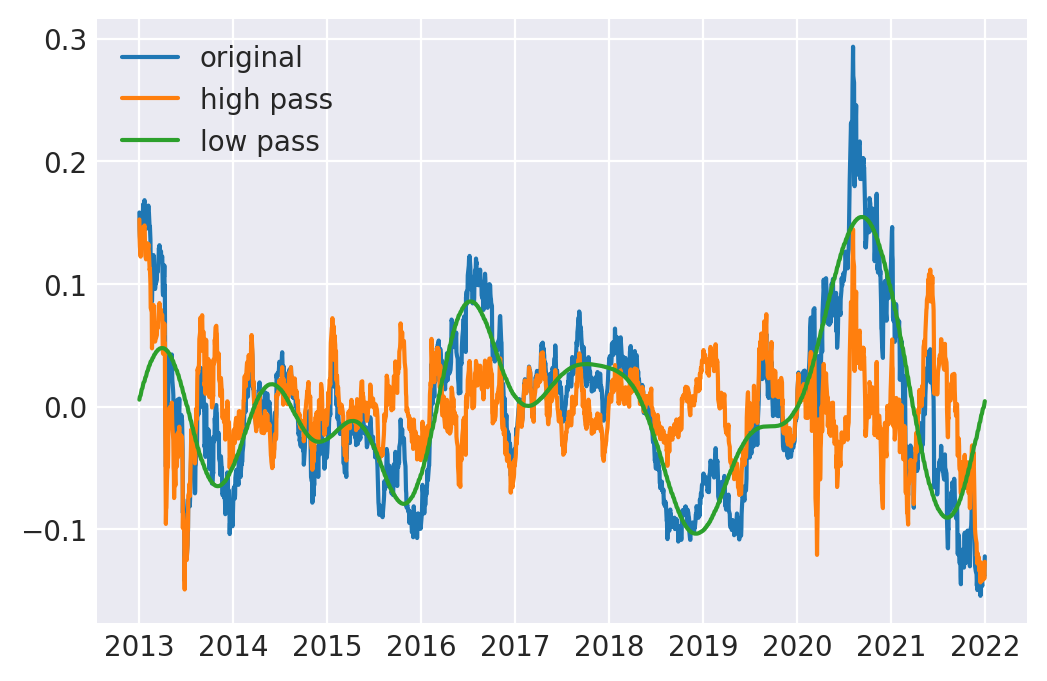

In [419]:
#detrended_g.values
numpy=np
#print(detrended_g.keys())
dates = detrended_g.keys()

#quack = quackHighPass(detrended_g, 1/250, 1)

plt.figure(dpi=200)
plt.plot(dates, detrended_g.values, label="original")
plt.plot(dates, quackFilter(detrended_g, 1/250, 1, mode="high"), label="high pass")
plt.plot(dates, quackFilter(detrended_g, 1/250, 1, mode="low"), label="low pass")
#plt.plot(dates, numpy.imag(quack))
plt.legend()
plt.show()

#quackFilter(detrended_g, 1/250, 1, mode="high")
#quackFilter(detrended_g, 1/250, 1, mode="low")

mode high keeping 2248
mode high keeping 2248


/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


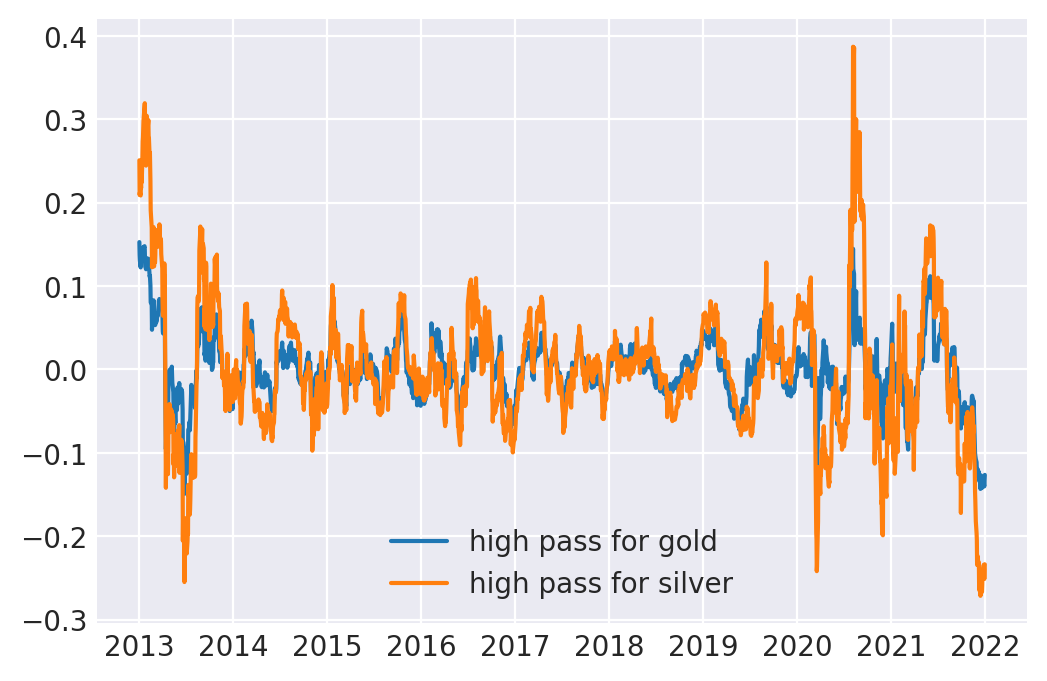

In [421]:
#detrended_g.values
numpy=np
#print(detrended_g.keys())
dates = detrended_g.keys()

#quack = quackHighPass(detrended_g, 1/250, 1)

plt.figure(dpi=200)
plt.plot(dates, quackFilter(detrended_g, 1/250, 1, mode="high"), label="high pass for gold")
plt.plot(dates, quackFilter(detrended_s, 1/250, 1, mode="high"), label="high pass for silver")
#plt.plot(dates, numpy.imag(quack))
plt.legend()
plt.show()

#quackFilter(detrended_g, 1/250, 1, mode="high")
#quackFilter(detrended_g, 1/250, 1, mode="low")

mode high keeping 2248
mode high keeping 2248


/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Coss-Correlation for Gold and Silver ')

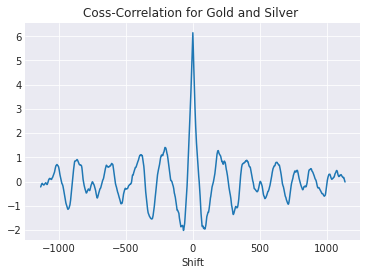

In [423]:
corr= np.correlate( quackFilter(detrended_g, 1/250, 1, mode="high") , quackFilter(detrended_s, 1/250, 1, mode="high"),  mode='same')

x_a= np.linspace(0,len(Df_g),len(Df_g))
x_array= x_a -np.mean(x_a)
plt.plot(x_array, corr)
plt.xlabel("Shift")
plt.title("Coss-Correlation for Gold and Silver ")


mode low keeping 19
mode low keeping 19


/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


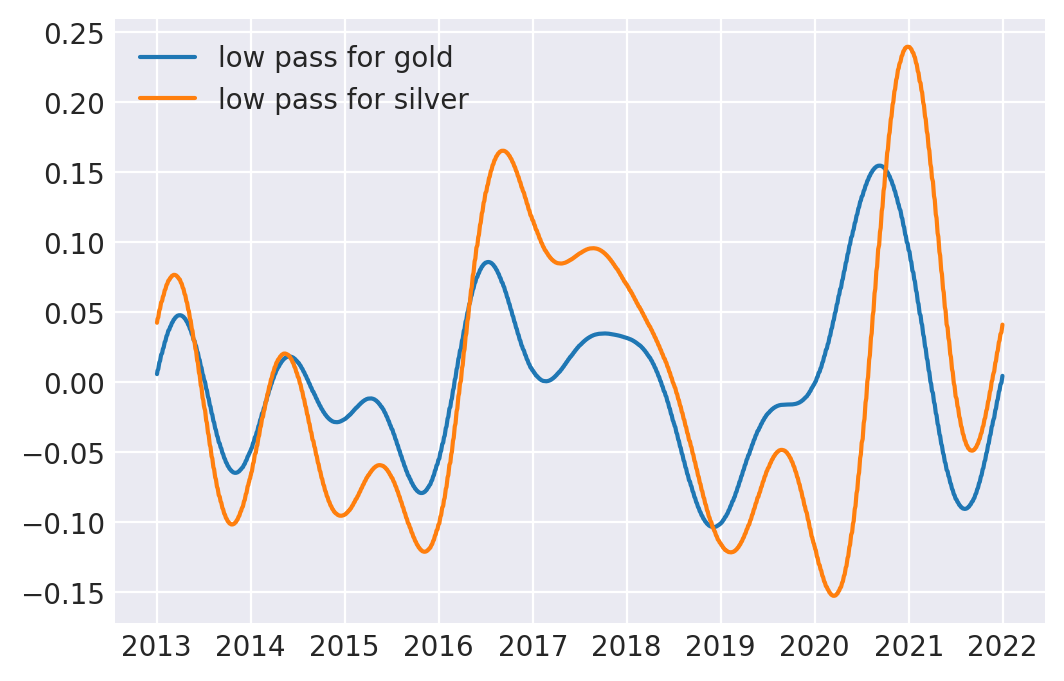

In [422]:
#detrended_g.values
numpy=np
#print(detrended_g.keys())
dates = detrended_g.keys()

#quack = quackHighPass(detrended_g, 1/250, 1)

plt.figure(dpi=200)
plt.plot(dates, quackFilter(detrended_g, 1/250, 1, mode="low"), label="low pass for gold")
plt.plot(dates, quackFilter(detrended_s, 1/250, 1, mode="low"), label="low pass for silver")
#plt.plot(dates, numpy.imag(quack))
plt.legend()
plt.show()

#quackFilter(detrended_g, 1/250, 1, mode="high")
#quackFilter(detrended_g, 1/250, 1, mode="low")

mode low keeping 19
mode low keeping 19


/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Coss-Correlation for Gold and Silver ')

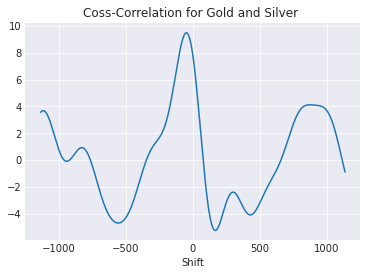

In [424]:
corr= np.correlate( quackFilter(detrended_g, 1/250, 1, mode="low") , quackFilter(detrended_s, 1/250, 1, mode="low"),  mode='same')

x_a= np.linspace(0,len(Df_g),len(Df_g))
x_array= x_a -np.mean(x_a)
plt.plot(x_array, corr)
plt.xlabel("Shift")
plt.title("Coss-Correlation for Gold and Silver ")

In [ ]:
#### for silver and gold small snd big trends are kept! 